# **최적화(Optimization)**

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs available:", tf.config.list_physical_devices('GPU'))

2024-11-28 12:34:46.913402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-28 12:34:47.842488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.13.0
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-11-28 12:34:50.246702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-28 12:34:50.420542: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-28 12:34:50.422049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## **1. 과적합(Overfitting)**
* 모델이 학습 데이터에 대한 성능은 매우 우수하지만, 새로운 데이터에 대해서는 일반화 성능이 떨어지는 현상

![Local Image](contents/fitting.png)

## **1-2. 과적합 해결방안: 데이터 증강(Data Augmentation)**
* 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 학습
* 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합 방지

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

In [ ]:
# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'], loc='best')
plt.grid()
plt.show()

235/235 - 2s - loss: 0.4042 - accuracy: 0.8593 - val_loss: 0.4379 - val_accuracy: 0.8470 - 2s/epoch - 7ms/step
Epoch 14/50
235/235 - 2s - loss: 0.3972 - accuracy: 0.8620 - val_loss: 0.4753 - val_accuracy: 0.8360 - 2s/epoch - 7ms/step
Epoch 15/50
235/235 - 2s - loss: 0.3914 - accuracy: 0.8634 - val_loss: 0.4489 - val_accuracy: 0.8448 - 2s/epoch - 7ms/step
Epoch 16/50
235/235 - 2s - loss: 0.3858 - accuracy: 0.8656 - val_loss: 0.4665 - val_accuracy: 0.8378 - 2s/epoch - 7ms/step
Epoch 17/50


## **1-3. 과적합 해결방안: 모델 복잡도 낮춤**
* 모델이 훈련 데이터의 노이즈까지 학습하게 되어 테스트 데이터나 새로운 데이터에 대한 일반화 성능 감소 
* 인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 32*32*3)  # 1차원 텐서로 변환 (50000, 3072)
x_test = x_test.reshape(10000, 32*32*3)    # 1차원 텐서로 변환 (10000, 3072)
x_train = x_train.astype(np.float32) / 255.0  # 0-1 범위로 정규화
x_test = x_test.astype(np.float32) / 255.0    # 0-1 범위로 정규화
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 원-핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10)    # 원-핫 인코딩

n_input = 32*32*3  # CIFAR-10 이미지의 픽셀 수 (3072)
n_hidden = 1024    # 은닉층 유닛 수
n_output = 10      # 출력층 유닛 수 (10개의 클래스)

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

## **1-4. 과적합 해결방안: 드롭아웃(Dropout)**
* 일정 비율의 가중치를 임의로 선택하여 불능으로 만들고 학습하는 규제 기법
* 불능이 될 에지는 샘플마다 독립적으로 난수를 이용하여 랜덤하게 선택

<img src="contents/Dropout.png" alt=" Dropout" width="600" height="300"/>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=10
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        # 훈련 집합과 검증 집합으로 분할
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax'))

        # 신경망 모델을 학습하고 평가하기
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean())

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])

## **1-5. 과적합 해결방안: 조기 종료(Early Stop)**
* 모델이 훈련 데이터에서 너무 오랜 시간 동안 학습하면, 학습 데이터에 과적합되어 테스트 데이터나 새로운 데이터에 대한 일반화 성능 감소
* 모델이 과적합되기 전에 학습을 멈추는 방법

<img src="contents/Early_stop.png" alt="Early Stop" width="400" height="300"/>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용) 및 EarlyStopping 적용
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
batch_siz = 128
generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# EarlyStopping 콜백 설정: 검증 손실이 5번의 에포크 동안 개선되지 않으면 학습 중단
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = cnn.fit_generator(generator.flow(x_train, y_train, batch_size=batch_siz),
                         epochs=50, validation_data=(x_test, y_test),
                         verbose=2, callbacks=[early_stopping])

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

## **1-6. 과적합 해결방안: 가중치 규제(Regularization)**
* 모델의 과적합을 방지하고 일반화 성능을 향상시키기 위해 가중치의 크기를 제한
* 모델이 복잡해지는 것을 억제하고, 과적합 감소시킴
* L1 정규화(L1 Regularization): 가중치의 절대값 합을 최소화
* L2 정규화(L2 Regularization): 가중치의 제곱합을 최소화

<img src="contents/l1l2.png" alt="Early Stop" width="400" height="300"/>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 모델 설계 (L1 정규화 적용)
cnn_l1 = Sequential()
cnn_l1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)))
cnn_l1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.01)))
cnn_l1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_l1.add(Dropout(0.25))
cnn_l1.add(Flatten())
cnn_l1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
cnn_l1.add(Dropout(0.5))
cnn_l1.add(Dense(10, activation='softmax', kernel_regularizer=l1(0.01)))

# 신경망 모델 학습 (L1 정규화 적용)
cnn_l1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist_l1 = cnn_l1.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 설계 (L2 정규화 적용)
cnn_l2 = Sequential()
cnn_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
cnn_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
cnn_l2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_l2.add(Dropout(0.25))
cnn_l2.add(Flatten())
cnn_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
cnn_l2.add(Dropout(0.5))
cnn_l2.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))

# 신경망 모델 학습 (L2 정규화 적용)
cnn_l2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist_l2 = cnn_l2.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res_l1 = cnn_l1.evaluate(x_test, y_test, verbose=0)
res_l2 = cnn_l2.evaluate(x_test, y_test, verbose=0)
print("L1 정규화 적용 모델 정확률은", res_l1[1] * 100)
print("L2 정규화 적용 모델 정확률은", res_l2[1] * 100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist_l1.history['accuracy'], label='Train L1')
plt.plot(hist_l1.history['val_accuracy'], label='Validation L1')
plt.plot(hist_l2.history['accuracy'], label='Train L2')
plt.plot(hist_l2.history['val_accuracy'], label='Validation L2')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist_l1.history['loss'], label='Train L1')
plt.plot(hist_l1.history['val_loss'], label='Validation L1')
plt.plot(hist_l2.history['loss'], label='Train L2')
plt.plot(hist_l2.history['val_loss'], label='Validation L2')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

## **2. 딥러닝 최적 파라미터 (Hyperparameter)**

### **2-1. 학습률 (Hyperparameter)**
- 학습률 값은 적절히 지정해야 함
- 너무 크면 발산하고, 너무 작으면 학습이 잘 되지 않음

#### (1). 학습률별 경사하강법

In [6]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 314.6 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 890.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 800.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 478.4 kB/s eta 0:00:00a 0:00:01


In [7]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

In [8]:
def f1(x):
  return x**2
def df_dx1(x):
  return 2*x

In [9]:
def gradient_descent2(f,df_dx, init_x, learning_rate=0.01, step_num=100):
    eps=1e-5
    count=0
    
    old_x=init_x
    min_x=old_x
    min_y=f(min_x)
    
    x_log, y_log=[min_x], [min_y]
    for i in range(step_num):
        grad=df_dx(old_x)
        new_x=old_x-learning_rate*grad
        new_y=f(new_x)
        
        if min_y>new_y:
            min_x=new_x
            min_y=new_y
        if np.abs(old_x-new_x) <eps:
            break
        
        x_log.append(old_x)
        y_log.append(new_y)
        
        old_x=new_x
        count+=1
        
    return x_log, y_log, count

init value = 0.001, count= 100
init value = 0.01, count= 100
init value = 0.1, count= 60
init value = 1.01, count= 100


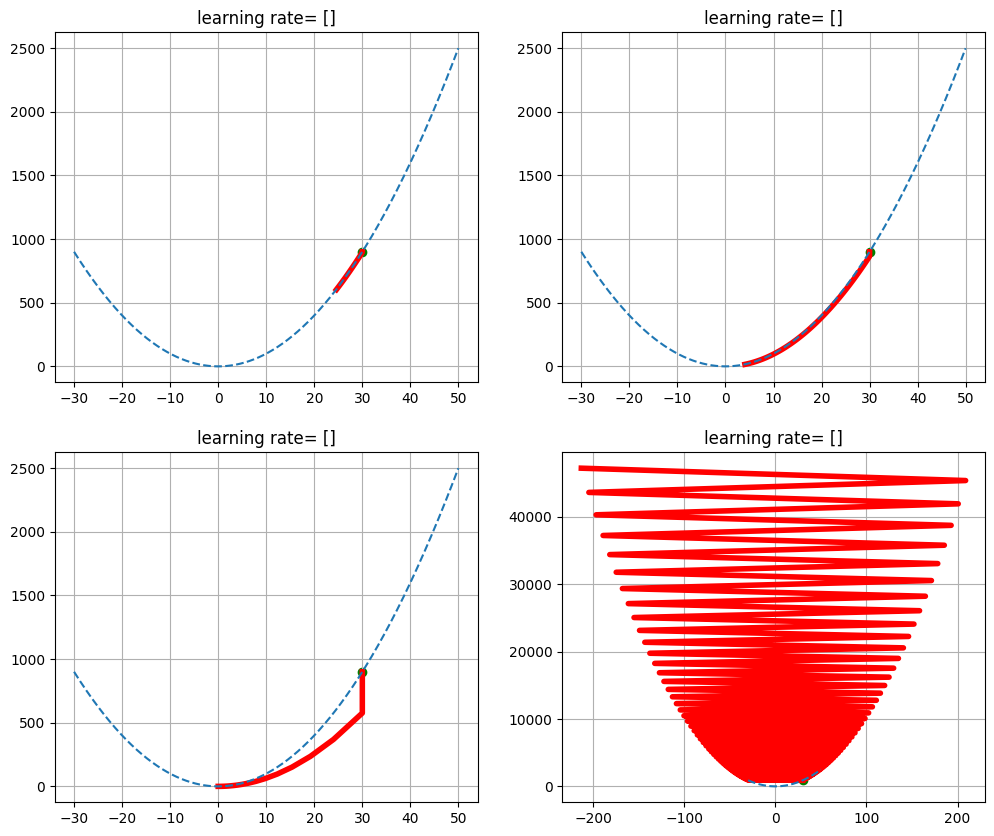

In [10]:
lr_list=[0.001, 0.01, 0.1, 1.01]
init_x=30.0
x=np.arange(-30, 50,0.01)
fig=plt.figure(figsize=(12,10))

for i, lr in enumerate(lr_list):
    x_log, y_log, count=gradient_descent2(f1, df_dx1,init_x=init_x, learning_rate=lr)
    ax=fig.add_subplot(2,2,i+1)
    ax.scatter(init_x, f1(init_x), color='green')
    ax.plot(x_log, y_log, color='red', linewidth='4')
    ax.plot(x, f1(x), '--')
    ax.grid()
    ax.title.set_text('learning rate= []'.format(str(lr)))
    print('init value = {}, count= {}'.format(str(lr), str(count)))

### **2-2. 확률적 경사하강법 (Stochastic Gradient Descent)**
* 경사하강법(Gradient Descent Algorithm)
    * 전체 데이터를 이용하여 경사를 구하기 때문에 최저점 수렴이 안정적
    * 전체 데이터를 모두 한 번에 처리하기 때문에 속도가 느리고 메모리가 많이 필요
* 확률적 경사하강법(Stochastic Gradient Descent)
    * 전체 데이터 중 랜덤하게 선택된 하나의 데이터를 이용하여 진행
    * 적은 데이터로 학습할 수 있고 최적화 속도가 빠름
    * 하나의 데이터를 이용하기 때문에 기울기의 방향이 크게 바뀌고 오차율이 높아지므로 최저점 안착이 비교적 어려움

<img src="contents/gd_sgd.png" alt="Early Stop" width="800" height="300"/>

(-7, 2)
(-6.335, -1.7999999999999998)
(-5.733175, 1.6199999999999997)
(-5.188523375, -1.4579999999999997)
(-4.695613654375, 1.3121999999999998)
(-4.249530357209375, -1.18098)
(-3.8458249732744845, 1.0628819999999997)
(-3.4804716008134085, -0.9565937999999994)
(-3.1498267987361346, 0.8609344199999993)
(-2.8505932528562017, -0.7748409779999994)
(-2.5797868938348625, 0.6973568801999994)
(-2.3347071389205505, -0.6276211921799995)
(-2.112909960723098, 0.5648590729619996)
(-1.9121835144544037, -0.5083731656657995)
(-1.7305260805812355, 0.4575358490992195)
(-1.566126102926018, -0.41178226418929753)
(-1.4173441231480464, 0.37060403777036777)
(-1.282696431448982, -0.333543633993331)
(-1.1608402704613288, 0.3001892705939978)
(-1.0505604447675025, -0.270170343534598)
(-0.9507572025145898, 0.2431533091811382)
(-0.8604352682757038, -0.21883797826302437)
(-0.778693917789512, 0.19695418043672192)
(-0.7047179955995084, -0.17725876239304972)
(-0.6377697860175552, 0.15953288615374472)
(-0.57718165634588

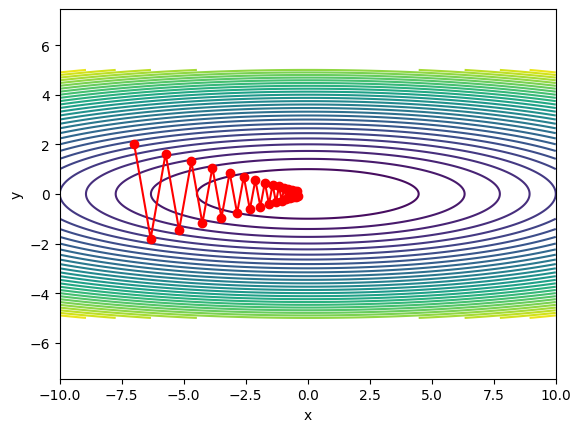

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class Sgd:
    """ SGD: Stochastic Gradient Descent
    W = W - lr * dL/dW
    """
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= self.learning_rate * gradients[key]

def fn(x, y):
    """f(x, y) = (1/20) * x**2 + y**2"""
    return x**2 / 20 + y**2

def fn_derivative(x, y): # 함수 fn의 미분값
    return x/10, 2*y

if __name__ == '__main__':
    # Sgd 클래스의 객체(인스턴스)를 생성
    sgd = Sgd(0.95)

    # ex01 모듈에서 작성한 fn(x, y) 함수의 최솟값을 임의의 점에서 시작해서 찾아감.
    init_position = (-7, 2)

    # 신경망에서 찾고자 하는 파라미터의 초깃값
    params = dict()
    params['x'], params['y'] = init_position[0], init_position[1]

    # 각 파라미터에 대한 변화율(gradient)
    gradients = dict()
    gradients['x'], gradients['y'] = 0, 0

    # 각 파라미터들(x, y)을 갱신할 때마다 갱신된 값을 저장할 리스트
    x_history = []
    y_history = []
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        gradients['x'], gradients['y'] = fn_derivative(params['x'], params['y'])  # gradients 갱신
        sgd.update(params, gradients)

    for x, y in zip(x_history, y_history):
        print(f'({x}, {y})')

    x = np.linspace(-10, 10, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    Z = fn(X, Y)

    plt.contour(X, Y, Z, 30)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')

    # 등고선 그래프에 파라미터(x, y)들이 갱신되는 과정을 추가.
    plt.plot(x_history, y_history, 'o-', color='red')
    plt.show()

### **2-3. 모멘텀 (Momentom)**
* 이전 방향 정보를 같이 고려하여 학습
* Saddle point를 만나거나 로컬 미니멈(Local Minimum)에 빠지는 위험 감소
* 네스테토프 모멘텀(Nesterov): 현재의 위치뿐만 아니라 예측된 다음 위치에서의 기울기를 사용하여 학습

<img src="contents/momentum_math.png" alt="Early Stop" width="600" height="400"/>

<img src="contents/momentum.png" alt="Early Stop" width="600" height="400"/>

* 모멘텀과 네스테토프 모멘텀 비교

### **2-4. 하이퍼 파라미터 최적화 예제**

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_dim=100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True, name='SGD') # 모멘텀 최적화 알고리즘 설정
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X_train, y_train, epochs=10, batch_size=32)

2024-11-28 12:47:40.507108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-28 12:47:40.510595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-28 12:47:40.513639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

NameError: name 'X_train' is not defined

### **2-5. 적응적 학습률 (Momentom)**
* 그레디언트는 최저점의 방향은 알려주지만, 이동량에 대한 정보는 없기 때문에 작은 학습률을 곱해 조금씩 보수적으로 이동
* 학습률이 너무 작으면 학습에 많은 시간 소요, 너무 크면 진동
* 사황에 맞게 학습률을 조절하는 방법
* Adagrad(Adaptive Gradient): 이전 그레디언트를 누적한 정보를 이용하여 학습률을 적응적으로 설정
* RMSProp(Root Mean Square + Propagation): 이전 그레디언트를 누적할 때 오래된 것의 영향을 줄이는 정책을 사용하여 AdaGrad를 개선한 기법
* Adam(Adaptive Learning + Momentum): RMSProp에 모멘텀을 적용한 기법

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'], loc='best')
plt.grid()
plt.show()

## **3. 하이퍼 파라미터 튜닝(Hyperparameter Tuning)**
* 머신러닝 모델의 성능을 최적화하기 위해 모델 학습 과정에서 고정된 값을 가지는 하이퍼파라미터를 조정하는 과정
* 주요 하이퍼파라미터로는 학습률(learning rate), 정규화 파라미터, 은닉층의 수와 크기 등

### **3-1. 그리드 서치(Grid Search)**
* 그리드 서치는 사전에 정의된 하이퍼파라미터 값의 조합을 모두 탐색하여 최적의 파라미터를 찾는 방법

![Local Image](contents/Grid_Search.png)

In [15]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define Keras model function
def create_model(optimizer='adam', activation='relu'):
    model = Sequential([...])  # Define model architecture
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'sigmoid', 'tanh']
}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn'

### **3-2. 랜덤 서치(Randomized Search)**
* 하이퍼파라미터 공간에서 무작위로 일부 조합을 선택하여 탐색하는 방법

![Local Image](contents/Random_Search.png)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter distributions
param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'sigmoid', 'tanh']
}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=5)
random_search_result = random_search.fit(X_train, y_train)

### **2-3. 베이지안 최적화(Bayesian Optimization)**
* 이전 탐색 결과를 바탕으로, 다음 탐색할 하이퍼파라미터 조합을 선택하는 방법

![Local Image](contents/Bayesian_Search.png)

In [ ]:
from skopt import BayesSearchCV

# Define hyperparameter search space
param_space = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'sigmoid', 'tanh']
}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, cv=3, n_iter=5)
bayes_search_result = bayes_search.fit(X_train, y_train)